In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

In [48]:
df =df.dropna()

In [5]:
df.isnull().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64

In [6]:
df.state.unique()

array(['az', 'ak', 'al', 'ca', 'co', 'ar', 'fl', 'ga', 'id', 'tx', 'ct',
       'va', 'ny', 'pa', 'mi', 'md', 'tn', 'sc', 'nd', 'sd', 'oh', 'ms',
       'mn', 'il', 'vt', 'wv', 'ma', 'wi', 'ok', 'or', 'wa', 'mo', 'nc',
       'ne', 'ia', 'nj', 'nm', 'la', 'mt', 'ky', 'ks', 'in', 'ut', 'wy',
       'de', 'nh', 'ri', 'hi', 'nv', 'me', 'dc'], dtype=object)

In [7]:
df.parking_options.unique()

array(['carport', 'street parking', 'attached garage',
       'off-street parking', 'detached garage', 'no parking',
       'valet parking'], dtype=object)

In [8]:
df.laundry_options.unique()

array(['laundry on site', 'laundry in bldg', 'w/d in unit', 'w/d hookups',
       'no laundry on site'], dtype=object)

In [44]:
df.type.unique()

array([0, 1, 2, 3])

In [10]:
df.region.unique()

array(['sierra vista', 'anchorage / mat-su', 'mobile', 'fairbanks',
       'modesto', 'pueblo', 'huntsville / decatur', 'fayetteville',
       'monterey bay', 'treasure coast', 'athens', 'hanford-corcoran',
       'pensacola', 'gainesville', 'flagstaff / sedona', 'santa barbara',
       'east idaho', 'kenai peninsula', 'western slope', 'amarillo',
       'new haven', 'lynchburg', 'hudson valley', 'harrisburg',
       'mohave county', 'odessa / midland', 'palm springs', 'bakersfield',
       'tallahassee', 'yuma', 'saginaw-midland-baycity',
       'southern maryland', 'clarksville', 'florida keys', 'hilton head',
       'grand forks', 'jackson', 'ithaca', 'rapid city / west SD',
       'lima / findlay', 'scranton / wilkes-barre', 'gulfport / biloxi',
       'charlottesville', 'waco', 'panama city', 'rochester',
       'san luis obispo', 'southeast alaska', 'mattoon-charleston',
       'roanoke', 'york', 'northwest CT', 'vermont', 'harrisonburg',
       'morgantown', 'st cloud', 'worcest

In [11]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['state']=le.fit(df['state']).transform(df['state'])
df['parking_options']=le.fit(df['parking_options']).transform(df['parking_options'])
df['laundry_options']=le.fit(df['laundry_options']).transform(df['laundry_options'])
df['type']=le.fit(df['type']).transform(df['type'])

In [13]:
df["pets_allowed"] = df["cats_allowed"] + df["dogs_allowed"] #do 1st

In [14]:
df.pets_allowed[df.pets_allowed == 2] = 1

<ipython-input-14-5bee7a8b1ed8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.pets_allowed[df.pets_allowed == 2] = 1


In [15]:
df.pets_allowed.unique()

array([1, 0], dtype=int64)

In [16]:
df = df.drop(columns =["region_url","region","url","lat","long","description","image_url","id","cats_allowed","dogs_allowed"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235969 entries, 2 to 384976
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    235969 non-null  int64  
 1   type                     235969 non-null  int32  
 2   sqfeet                   235969 non-null  int64  
 3   beds                     235969 non-null  int64  
 4   baths                    235969 non-null  float64
 5   smoking_allowed          235969 non-null  int64  
 6   wheelchair_access        235969 non-null  int64  
 7   electric_vehicle_charge  235969 non-null  int64  
 8   comes_furnished          235969 non-null  int64  
 9   laundry_options          235969 non-null  int32  
 10  parking_options          235969 non-null  int32  
 11  state                    235969 non-null  int32  
 12  pets_allowed             235969 non-null  int64  
dtypes: float64(1), int32(4), int64(8)
memory usage: 21.6 MB


In [34]:
df.baths.unique()

array([2, 1, 3, 0, 4, 5, 6, 7, 8])

In [19]:
df["baths"] = df["baths"].astype(int)

<AxesSubplot:xlabel='state'>

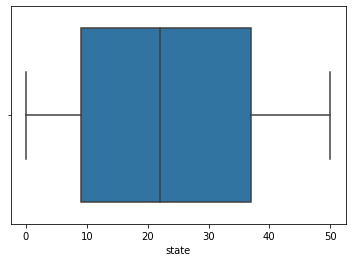

In [21]:
sns.boxplot(x=df['state'])

In [22]:
index_names = df[ (df['state'] >= 38) | (df['state'] <= 9)].index

df.drop(index_names, inplace = True)

In [23]:
df.state.unique()

array([10, 13, 34, 22, 20, 28, 35, 25, 23, 14, 19, 36, 37, 24, 27, 29, 12,
       31, 32, 18, 26, 17, 16, 15, 30, 11, 33, 21])

In [36]:
df.beds.unique()

array([2, 4, 3, 1, 5, 6, 8, 7], dtype=int64)

In [31]:
beds = df[ ((df['beds'] > 8) | (df['beds'] < 1 ))].index
df.drop(beds, inplace = True)

In [39]:
df.baths.unique()

array([2, 1, 3, 4, 5, 6, 7, 8])

In [38]:
baths = df[ ((df['baths'] > 8) | (df['baths'] < 1 ))].index
df.drop(baths, inplace = True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111851 entries, 25 to 384901
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   price                    111851 non-null  int64
 1   type                     111851 non-null  int32
 2   sqfeet                   111851 non-null  int64
 3   beds                     111851 non-null  int64
 4   baths                    111851 non-null  int32
 5   smoking_allowed          111851 non-null  int64
 6   wheelchair_access        111851 non-null  int64
 7   electric_vehicle_charge  111851 non-null  int64
 8   comes_furnished          111851 non-null  int64
 9   laundry_options          111851 non-null  int32
 10  parking_options          111851 non-null  int32
 11  state                    111851 non-null  int32
 12  pets_allowed             111851 non-null  int64
dtypes: int32(5), int64(8)
memory usage: 9.8 MB


In [45]:
df['type'].value_counts().sum()

111851

In [46]:
df.shape

(111851, 13)

In [53]:
df.to_csv('Preprocessed_data.csv',index=False) 